In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('data/Titanic_train.csv')

- **Survived**: The target variable. 0 = No, 1 = Yes
- **Pclass**: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
- **Name**
- **Sex** 
- **Age** 
- **SibSp**: number of siblings or spouses aboard the Titanic 
- **Parch**: number of parents or children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

<img src="https://dl.dropboxusercontent.com/s/itkts96f9nqxyqs/titanic.jpg?dl=0" width="800">



In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Pclass

In [7]:
data.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [8]:
one_hot = True

pclass = pd.DataFrame()

if one_hot:
    pclass = pd.get_dummies( data.Pclass , prefix='Pclass' )
else:
    pclass = pd.DataFrame(data={'Pclass':data.Pclass})

pclass.head()


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## Title

In [9]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
title = pd.DataFrame()

title[ 'Title' ] = data[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Civil",
                    "Mlle":       "Civil",
                    "Ms":         "Civil",
                    "Mr" :        "Civil",
                    "Mrs" :       "Civil",
                    "Miss" :      "Civil",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()


,Civil,Master,Officer,Royalty
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


## Sex

In [11]:
data.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [12]:
# Transform Sex into binary values 0 and 1
sex = pd.DataFrame(data={'Sex':np.where( data.Sex == 'male' , 1 , 0 )})

sex.head()

,Sex
0,1
1,0
2,0
3,0
4,1


## Age

In [13]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

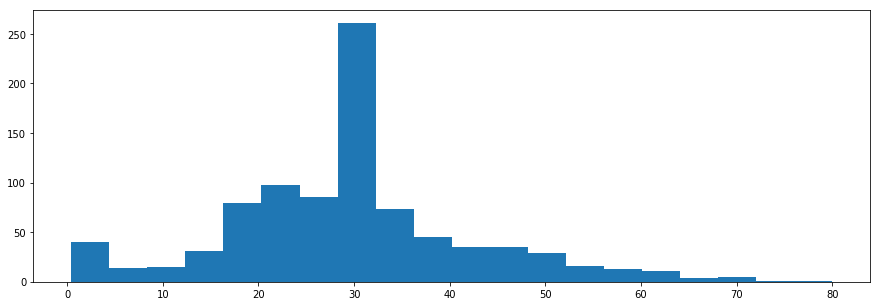

,Child,Adult,Old
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [14]:
one_hot = True

# Create dataset
age = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
age[ 'Age' ] = data.Age.fillna( data.Age.mean() )

plt.figure(figsize=(15,5))
plt.hist(age[ 'Age' ], bins=20)
plt.show()

if one_hot:
    # Transform Age into binary values 0 and 1
    #age = pd.DataFrame(data={'Age':np.where( data.Age > 10 , 1 , 0 )})
    
    age[ 'Child' ] = age[ 'Age' ].map( lambda s : 1 if s < 10 else 0 )
    age[ 'Adult' ]  = age[ 'Age' ].map( lambda s : 1 if (10 <= s) and (s <= 50) else 0 )
    age[ 'Old' ]  = age[ 'Age' ].map( lambda s : 1 if 50 <= s else 0 )

    age = age.drop(['Age'], axis=1)

    
age.head()


## Family Size

In [15]:
data.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [16]:
data.SibSp

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [17]:
one_hot = True

family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = data[ 'Parch' ] + data[ 'SibSp' ] + 1

if one_hot:
    # introducing other features based on the family size
    family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
    family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
    family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

    family = family.drop(['FamilySize'], axis=1)
    
family.head()


,Family_Single,Family_Small,Family_Large
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


## Ticket

In [18]:
data.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [19]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = data[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()


,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,...,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Fare

In [20]:
data.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

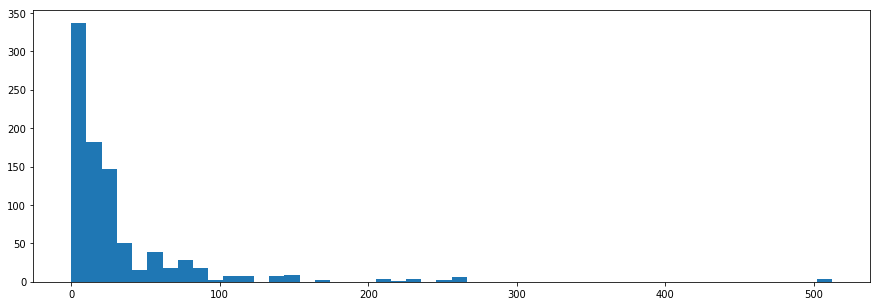

,Low fare,Medium Fare,High Fare
0,0,0,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,0


In [21]:
one_hot = True

# Create dataset
fare = pd.DataFrame()

# Fill missing values of Fare with the average of Fare (mean)
fare[ 'Fare' ] = data.Fare.fillna( data.Fare.mean() )

plt.figure(figsize=(15,5))
plt.hist(fare[ 'Fare' ], bins=50)
plt.show()

if one_hot:
    # introducing other features based on the family size
    fare[ 'Low fare' ] = fare[ 'Fare' ].map( lambda s : 0 if s < 50 else 0 )
    fare[ 'Medium Fare' ]  = fare[ 'Fare' ].map( lambda s : 1 if 50 <= s <= 200 else 0 )
    fare[ 'High Fare' ]  = fare[ 'Fare' ].map( lambda s : 1 if 200 <= s else 0 )

    fare = fare.drop(['Fare'], axis=1)

fare.head()


## Cabin 

In [22]:
data.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [23]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = data.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()


,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


## Embarked

In [24]:
data.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [25]:
one_hot = True

if one_hot:
    embarked = pd.get_dummies( data.Embarked , prefix='Embarked' )
else:
    embarked = pd.DataFrame(data={'Embarked':np.zeros(len(data.Embarked))})
    embarked['Embarked'][data.Embarked == 'C'] = 1
    embarked['Embarked'][data.Embarked == 'Q'] = 2
    
embarked.head()


,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


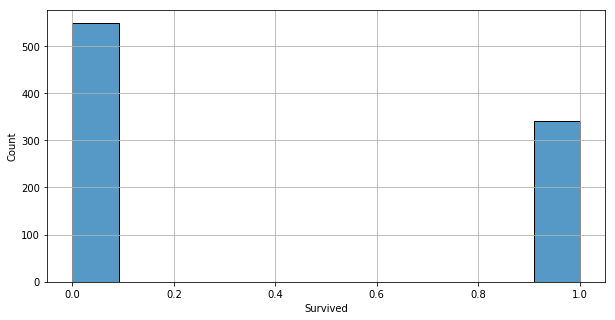

In [26]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Survived")
plt.grid()

In [27]:
y = data.Survived
# pclass, title, sex, age, family, ticket, fare, cabin , embarked
X = pd.concat( [ pclass, title, sex, age, family, fare , embarked  ] , axis=1 )


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


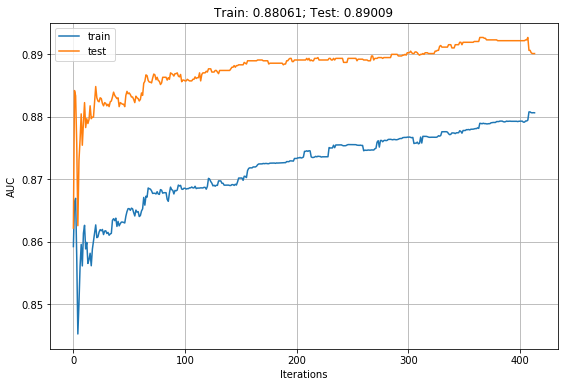

In [29]:
from xgboost import XGBClassifier

eval_set = [(X_train, y_train), (X_test, y_test)]

my_model_pruned = XGBClassifier(
    n_estimators=1000, 
    learning_rate=0.01, 
    colsample_bytree = 0.8,
    max_depth=3, 
    subsample = 0.8,
    max_leaves=5,
    min_child_weight = 5,
    objective='binary:logistic', 
    reg_alpha = 0.,
    reg_lambda= 0.,
    gamma=1)

my_model_pruned.fit(X_train, y_train, early_stopping_rounds=50, eval_set=eval_set, eval_metric = ['auc'], verbose=False)

results_pruned = my_model_pruned.evals_result()

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(results_pruned['validation_0']['auc'], label='train')
plt.plot(results_pruned['validation_1']['auc'], label='test')
plt.title("Train: {}; Test: {}".format(results_pruned['validation_0']['auc'][-1], results_pruned['validation_1']['auc'][-1]))
plt.xlabel("Iterations")
plt.ylabel("AUC")
#$plt.ylim([0.20,0.7])
plt.legend()
plt.grid()



In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, my_model_pruned.predict(X_test))

0.8324022346368715

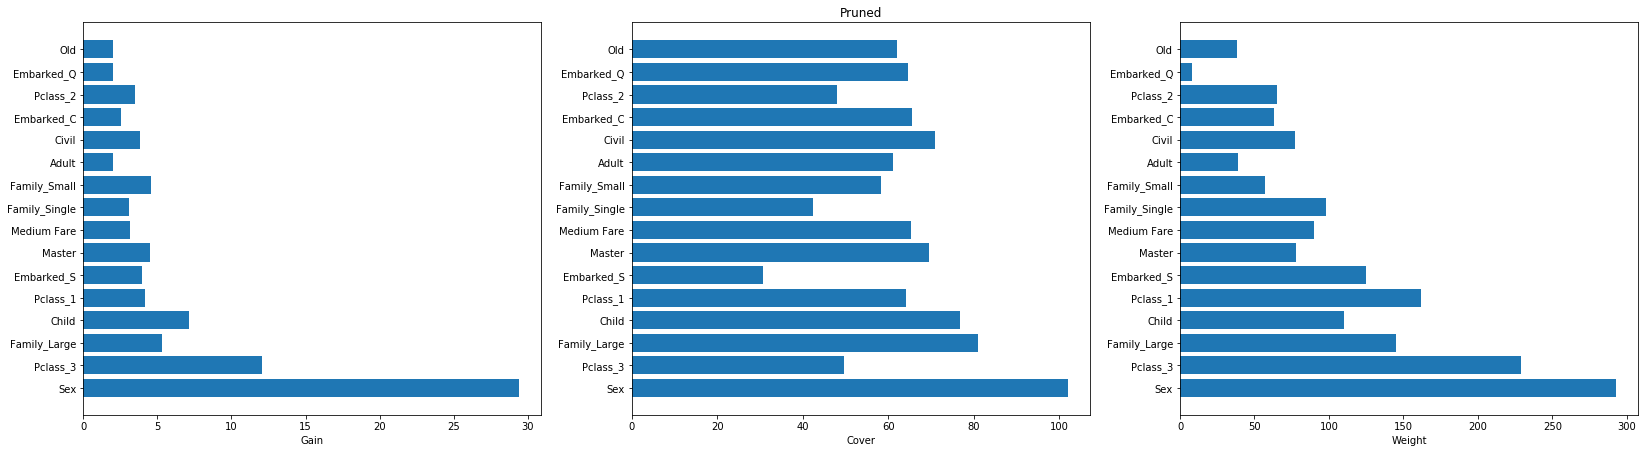

In [30]:
features = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

d = {'feature':[], 'weight': [], 'gain': [], 'cover': [], 'total_gain': [], 'total_cover': []}
data_feat = pd.DataFrame(data=d)

for f in features:
    feature_important = my_model_pruned.get_booster().get_score(importance_type=f)
    values = list(feature_important.values())
    data_feat[f] = values

keys=feature_important.keys()
data_feat['feature']=keys

plt.figure(figsize=(23,12))

ax1 = plt.subplot(231)
plt.barh( data_feat['feature'], data_feat['gain'])
plt.xlabel("Gain")

ax2= plt.subplot(232, sharey = ax1)
plt.barh( data_feat['feature'], data_feat['cover'])
plt.title('Pruned')
plt.xlabel("Cover")

plt.subplot(233, sharey = ax1)
plt.barh( data_feat['feature'], data_feat['weight'])
plt.xlabel("Weight")
plt.tight_layout()




<Figure size 720x720 with 0 Axes>

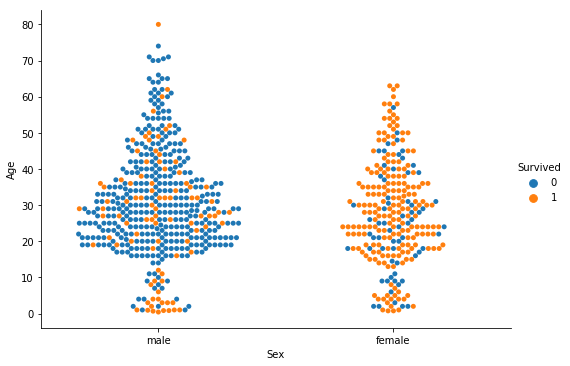

In [31]:
plt.figure(figsize=(10,10))
sns.catplot(x="Sex", y="Age", hue="Survived", kind="swarm", data=data, height=5, aspect=11.7/8.27)


/Users/lspina/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lspina/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lspina/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

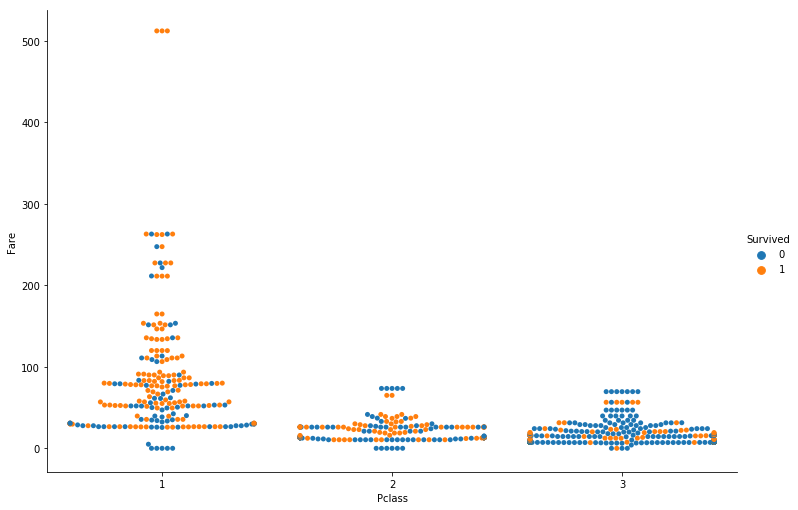

In [64]:
plt.figure(figsize=(10,10))
sns.catplot(x="Pclass", y="Fare", hue="Survived", kind="swarm", data=data, height=7, aspect=11.7/8)
